# Atelier  4 : Apprentissage Supervisé

## K-plus proche voisin (KNN) (Reconnaissance de chiffres) 

Performance pour k=1 :
  - Exactitude (Accuracy)  : 0.9822
  - Précision (Precision)  : 0.9823
  - Rappel (Recall)        : 0.9822
  - F1-score               : 0.9822
  - Matrice de confusion :
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]
--------------------------------------------------
Performance pour k=2 :
  - Exactitude (Accuracy)  : 0.9844
  - Précision (Precision)  : 0.9846
  - Rappel (Recall)        : 0.9844
  - F1-score               : 0.9843
  - Matrice de confusion :
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]

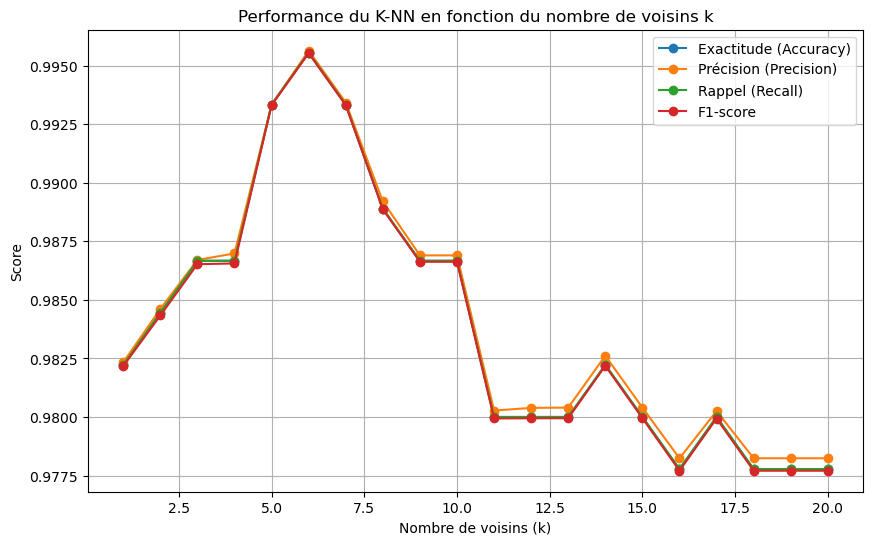

In [6]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Charger les données
digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])
train_x = digit.data  # variables d'entrée
train_y = digit.target  # étiquettes (variables de sortie)

# Découpage du jeu de données (25% pour le test)
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

# Initialiser des listes pour stocker les différentes métriques
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Boucle sur différentes valeurs de k (nombre de voisins)
k_values = range(1, 21)  # Tester pour k de 1 à 20
for k in k_values:
    # Initialiser et entraîner le K-NN
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    
    # Prédictions sur le jeu de test
    y_pred = KNN.predict(x_test)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Stocker les métriques dans les listes
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Afficher les métriques pour cette valeur de k
    print(f"Performance pour k={k} :")
    print(f"  - Exactitude (Accuracy)  : {accuracy:.4f}")
    print(f"  - Précision (Precision)  : {precision:.4f}")
    print(f"  - Rappel (Recall)        : {recall:.4f}")
    print(f"  - F1-score               : {f1:.4f}")
    print("  - Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Tracer les performances en fonction de k
plt.figure(figsize=(10, 6))

# Courbe d'exactitude
plt.plot(k_values, accuracies, marker='o', label='Exactitude (Accuracy)')
# Courbe de précision
plt.plot(k_values, precisions, marker='o', label='Précision (Precision)')
# Courbe de rappel
plt.plot(k_values, recalls, marker='o', label='Rappel (Recall)')
# Courbe de F1-score
plt.plot(k_values, f1_scores, marker='o', label='F1-score')

plt.title('Performance du K-NN en fonction du nombre de voisins k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


## Bayésien Naïf (SPAM Filter) 

In [17]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
print(os.listdir(r"C:\Users\merye\DB\DB") )
df = pd.read_csv(r"C:\Users\merye\DB\DB\spam.csv", encoding='latin-1')[['v1', 'v2']] 
df.columns = ['label', 'message'] 
print(df.head()) 

['BN.py', 'diabetes.csv', 'MultivariateLinearRegression.xlsx', 'Position_Salaries.csv', 'spam.csv', 'univariateLinearRegression.csv']
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [19]:
import nltk 
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\merye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
import string 
from nltk.corpus import stopwords #Natural Language Toolkit 
from nltk import PorterStemmer as Stemmer 
def process(text): 
    # lowercase it 
    text = text.lower() 
    # remove punctuation 
    text = ''.join([t for t in text if t not in string.punctuation]) 
    # remove stopwords 
    text = [t for t in text.split() if t not in 
stopwords.words('english')] 
    # stemming 
    st = Stemmer() 
    text = [st.stem(t) for t in text] 
    # return token list 
    return text 
# Testing 
print(process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')) 
# Test avec notre dataset 
print(df['message'][:20].apply(process)) 

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']
0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidfv = TfidfVectorizer(analyzer=process) 
data = tfidfv.fit_transform(df['message']) 
mess = df.iloc[2]['message'] 
print(mess) 
print(tfidfv.transform([mess])) 
#visualiser 
j = tfidfv.transform([mess]).toarray()[0] 
print('index\tidf\ttfidf\tterm') 
for i in range(len(j)): 
    if j[i] != 0: 
       print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names_out()[i],sep='\t') 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 7741)	0.18906287739887084
  (0, 7708)	0.14471405235314777
  (0, 7276)	0.12336193745345178
  (0, 7099)	0.2190885570936267
  (0, 6959)	0.11759458460817876
  (0, 5856)	0.16027970945850903
  (0, 5815)	0.2330497030932461
  (0, 5768)	0.2330497030932461
  (0, 4592)	0.15903719770411495
  (0, 3091)	0.11505037200973967
  (0, 2969)	0.16669800498830506
  (0, 2868)	0.4660994061864922
  (0, 2748)	0.3571909758763146
  (0, 2246)	0.20302402339849024
  (0, 2076)	0.19516151371199045
  (0, 1180)	0.16669800498830506
  (0, 833)	0.2190885570936267
  (0, 433)	0.22518719340674634
  (0, 420)	0.22518719340674634
  (0, 413)	0.09987750376879972
  (0, 72)	0.2330497030932461
index	idf	tfidf	term
72	8.5271	0.2330	08452810075over18
413	3.6544	0.0999	2
420	8.2394	0.2252	2005
433	8.2394	0.2252	21st
833	8.0163	0.2191	87121
1180	6.0993	0.1667	appli
2076	7.1408	0.

In [28]:
########### TRAIN ############ 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split 
spam_filter = Pipeline([ 
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score 
    ('classifier', MultinomialNB())   # train on TFIDF vectors with NB 
]) 
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21) 
spam_filter.fit(x_train, y_train) 
 
######## TEST ############## 
predictions = spam_filter.predict(x_test) 
count = 0 
for i in range(len(y_test)): 
    if y_test.iloc[i] != predictions[i]: 
        count += 1 
print('Total number of test cases', len(y_test)) 
print('Number of wrong of predictions', count) 

Total number of test cases 1115
Number of wrong of predictions 39


In [30]:
# Afficher les résultats
print('Total number of test cases:', len(y_test))
print('Number of wrong predictions:', count)

# Question (a) : Quel est le nombre de prédictions erronées ?
# Le nombre de prédictions erronées est stocké dans la variable `count`.

# Question (b) : Visualiser les prédictions erronées classées comme "ham"
misclassified_ham = x_test[(predictions == 'ham') & (y_test != 'ham')]
print("\nMessages prédits comme 'ham' mais incorrects :")
print(misclassified_ham)

# Question (c) : Vérifier si un message est "ham" ou "spam"
test_message = "Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600."
result = spam_filter.predict([test_message])
print(f"\nLe message '{test_message}' est classé comme : {result[0]}")

Total number of test cases: 1115
Number of wrong predictions: 39

Messages prédits comme 'ham' mais incorrects :
419     Send a logo 2 ur lover - 2 names joined by a h...
3139    sexy sexy cum and text me im wet and warm and ...
3790    Twinks, bears, scallies, skins and jocks are c...
2877    Hey Boys. Want hot XXX pics sent direct 2 ur p...
2377    YES! The only place in town to meet exciting a...
1499    SMS. ac JSco: Energy is high, but u may not kn...
3417    LIFE has never been this much fun and great un...
3358    Sorry I missed your call let's talk when you h...
2412    I don't know u and u don't know me. Send CHAT ...
3862    Oh my god! I've found your number again! I'm s...
659     88800 and 89034 are premium phone services cal...
3109    Good Luck! Draw takes place 28th Feb 06. Good ...
5466    http//tms. widelive.com/index. wml?id=820554ad...
1268    Can U get 2 phone NOW? I wanna chat 2 set up m...
491     Congrats! 1 year special cinema pass for 2 is ...
2246    Hi ya bab

In [32]:
#Calculez Rappel  Précision F1 score 
from sklearn.metrics import classification_report 
print(classification_report(predictions, y_test)) 

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.72      1.00      0.84       101

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



## Régression Linéaire (Prédiction du gain) 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
df = pd.read_csv(r"C:\Users\merye\DB\DB\univariateLinearRegression.csv") 
print(len(df)) 

96


In [37]:
#selection de la première colonne de la base (la taille de la population) 
X = df.iloc[0:len(df),0] 
#selection de la deuxième colonne de la base (le profit effectué) 
Y = df.iloc[0:len(df),1] 

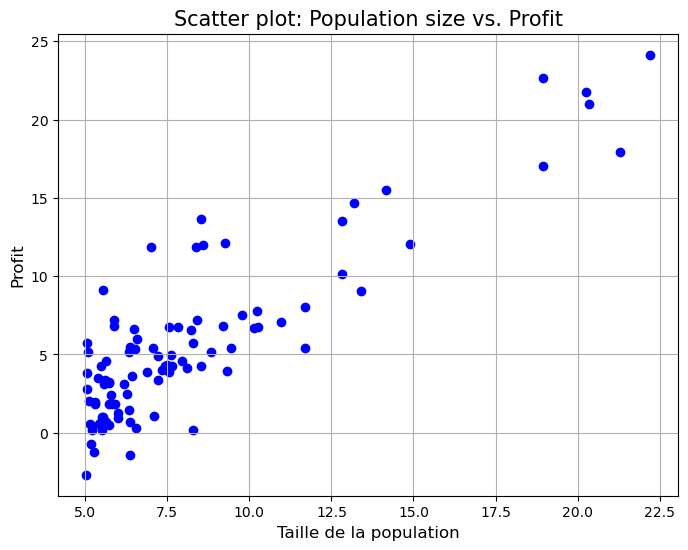

In [39]:
# Visualiser les données avec un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', marker='o')

# Ajouter des titres et des labels
plt.title("Scatter plot: Population size vs. Profit", fontsize=15)
plt.xlabel("Taille de la population", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Afficher la grille pour une meilleure lecture
plt.grid(True)

# Afficher le plot
plt.show()

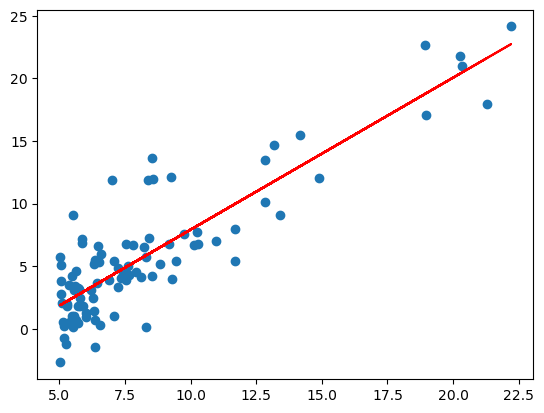

20.38709883129834


In [45]:
#linregress() renvoie plusieurs variables de retour. On s'interesse au slope et intercept 
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 
def F(x): 
 return slope * x + intercept 
#la variable fitLine est un tableau de valeurs prédites depuis la tableau de variables X 
fitLine = F(X) 
plt.scatter(X,Y) 
plt.plot(X, fitLine, c='r') 
plt.show() 
print (F(20.27)) 

## Régression multivariée (Prédiction du prix) 

In [48]:
import pandas as pd 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
df = pd.read_excel(r"C:\Users\merye\DB\DB\multivariateLinearRegression.xlsx") 
print(df.head()) 

   taille_en_pieds_carre  nb_chambres    prix
0                   2104            3  399900
1                   1600            3  329900
2                   2400            3  369000
3                   1416            2  232000
4                   3000            4  539900


In [52]:
#Récupérer le prix : les valeurs observées pour la variable Cible 
Y = df["prix"] 
#Récupérer les variables prédictives : La superficie en pieds² et le nb chambre 
X = df[['taille_en_pieds_carre','nb_chambres']] 

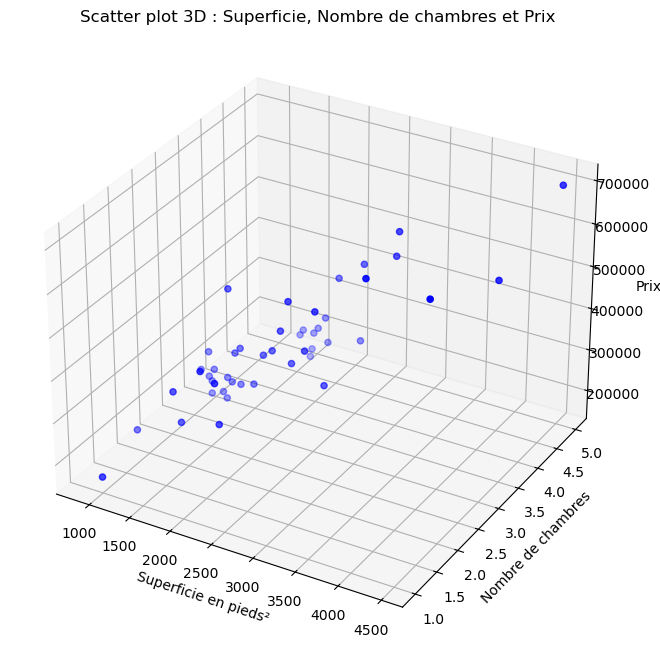

In [54]:
# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points (scatter plot)
ax.scatter(X['taille_en_pieds_carre'], X['nb_chambres'], Y, c='blue', marker='o')

# Ajouter des étiquettes
ax.set_xlabel("Superficie en pieds²")
ax.set_ylabel("Nombre de chambres")
ax.set_zlabel("Prix")

# Ajouter un titre
ax.set_title("Scatter plot 3D : Superficie, Nombre de chambres et Prix")

# Afficher la visualisation
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler() 
X_scaled = scale.fit_transform(X[['taille_en_pieds_carre', 'nb_chambres']].values)
print(X_scaled) 

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

In [62]:
model = sm.OLS(Y, X).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              631.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                    1.19e-33
Time:                        12:32:34   Log-Likelihood:                         -589.11
No. Observations:                  47   AIC:                                      1182.
Df Residuals:                      45   BIC:                                      1186.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [64]:
def predict_price_of_house(taille_maison, nb_chambre): 
 return 140.8611 * taille_maison + 1.698e+04 * nb_chambre 
print(predict_price_of_house(4500,5)) 

718774.95


## Régression polynomiale (Prédiction du salaire) 

In [67]:
# Importez les libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
df_sal = pd.read_csv(r"C:\Users\merye\DB\DB\Position_Salaries.csv") 
df_sal.head() 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


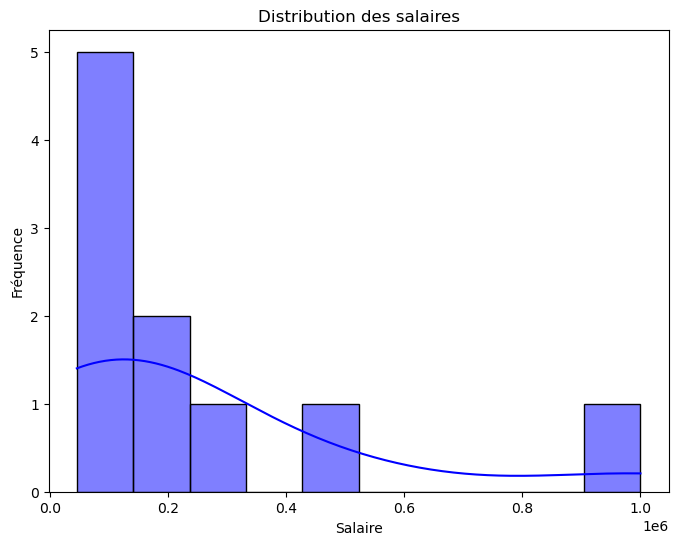

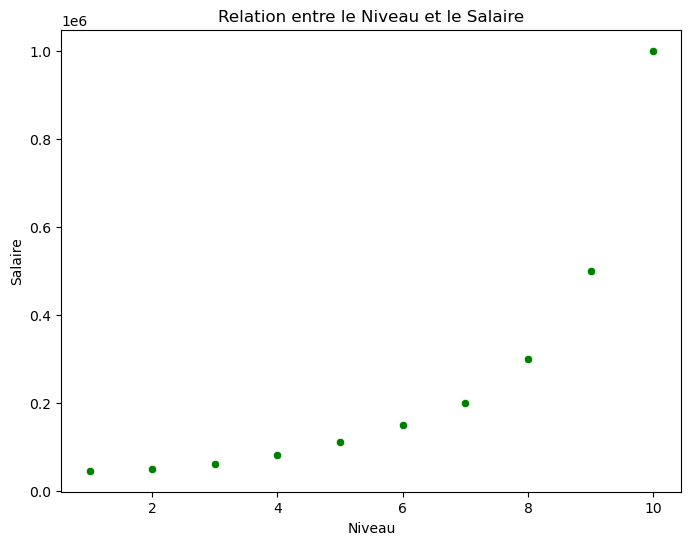

In [69]:
# Obtenir une description statistique des données
print(df_sal.describe())

# Visualiser la distribution des salaires
plt.figure(figsize=(8,6))
sns.histplot(df_sal['Salary'], kde=True, bins=10, color='blue')
plt.title('Distribution des salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()

# Scatter plot pour examiner la relation entre le salaire et le niveau
plt.figure(figsize=(8,6))
sns.scatterplot(x='Level', y='Salary', data=df_sal, color='green')
plt.title('Relation entre le Niveau et le Salaire')
plt.xlabel('Niveau')
plt.ylabel('Salaire')
plt.show()

In [71]:
X = df_sal.iloc[:, 1:-1].values  # independent 
y = df_sal.iloc[:, -1].values  # dependent 
# Train linear regression model  
lr = LinearRegression() 
lr.fit(X, y) 
# Train polynomial regression model  
pr = PolynomialFeatures(degree = 4) 
X_poly = pr.fit_transform(X) 
lr_2 = LinearRegression() 
lr_2.fit(X_poly, y) 

LinearRegression()

In [73]:
# TEST 
y_pred_lr = lr.predict(X)           
# Linear Regression 
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression 

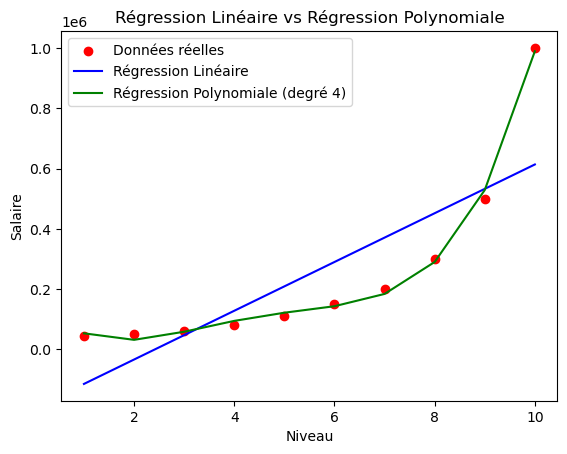

In [75]:
# Visualisation des résultats

# Scatter plot des données réelles
plt.scatter(X, y, color='red', label='Données réelles')

# Tracer la régression linéaire
plt.plot(X, y_pred_lr, color='blue', label='Régression Linéaire')

# Tracer la régression polynomiale
plt.plot(X, y_pred_poly, color='green', label='Régression Polynomiale (degré 4)')

# Ajouter des labels et un titre
plt.title('Régression Linéaire vs Régression Polynomiale')
plt.xlabel('Niveau')
plt.ylabel('Salaire')
plt.legend()

# Afficher le graphique
plt.show()

Le graphique montre que la régression linéaire (ligne bleue) ne s'ajuste pas bien aux données, car la relation entre le niveau et le salaire est non linéaire. En revanche, la régression polynomiale (ligne verte) de degré 4 capture mieux cette relation complexe, surtout aux niveaux supérieurs où les salaires augmentent rapidement. Ainsi, la régression polynomiale est plus adaptée pour prédire les salaires en fonction du niveau.

In [80]:
# Predict with linear regression 
print(f'Linear Regression result : {lr.predict([[7.5]])}') 
# Predict with polynomial regression 
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[7.5]]))}') 

Linear Regression result : [411257.57575758]
Polynomial Regression result : [225126.29297782]


## Régression logistique (classification des fleurs d’iris) 

In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
#chargement de base de données iris 
iris = datasets.load_iris() 
# choix de deux variables : Utiliser les deux premières colonnes afin d'avoir un problème de classification binaire 
X = iris.data[:, :2] 
y = (iris.target != 0) * 1 # re-étiquetage des fleurs 

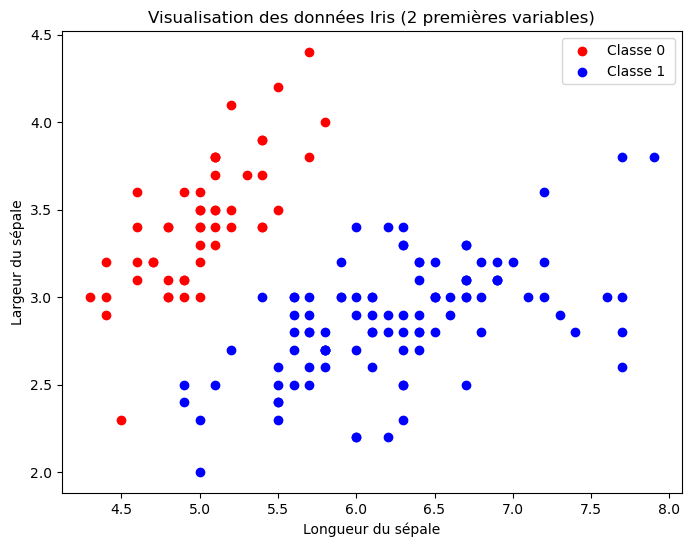

In [92]:
# Visualisation des données
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0 ')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1 ')
plt.title("Visualisation des données Iris (2 premières variables)")
plt.xlabel("Longueur du sépale")
plt.ylabel("Largeur du sépale")
plt.legend()
plt.show()

In [94]:
model = LogisticRegression(C=1e20)  
model.fit(X, y) 

LogisticRegression(C=1e+20)

In [98]:
# Les valeurs à tester
test_values = np.array([[5.5, 2.5], [7, 3], [3, 2], [5, 3]])

# Prédiction des classes pour ces valeurs
predicted_classes = model.predict(test_values)

# Affichage des résultats
for i, val in enumerate(test_values):
    print(f"Valeurs : {val} -> Classe prédite : {predicted_classes[i]}")




Valeurs : [5.5 2.5] -> Classe prédite : 1
Valeurs : [7. 3.] -> Classe prédite : 1
Valeurs : [3. 2.] -> Classe prédite : 0
Valeurs : [5. 3.] -> Classe prédite : 0


## Arbre de décision 

In [107]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  
from sklearn import metrics  
from sklearn.tree import export_graphviz  
from IPython.display import Image   
import matplotlib.pyplot as plt 
 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] 
diabetes_data= pd.read_csv(r"C:\Users\merye\DB\DB\diabetes.csv", header=None, names=col_names) 
diabetes_data.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [111]:
# Vérification des types de colonnes
print(diabetes_data.dtypes)


pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


In [117]:
# Conversion des colonnes en types numériques
diabetes_data = diabetes_data.apply(pd.to_numeric, errors='coerce')

# Vérification des types de colonnes après conversion
print(diabetes_data.dtypes)


pregnant    float64
glucose     float64
bp          float64
skin        float64
insulin     float64
bmi         float64
pedigree    float64
age         float64
label       float64
dtype: object


In [119]:
# Supprimer les lignes contenant des valeurs manquantes
diabetes_data = diabetes_data.dropna()

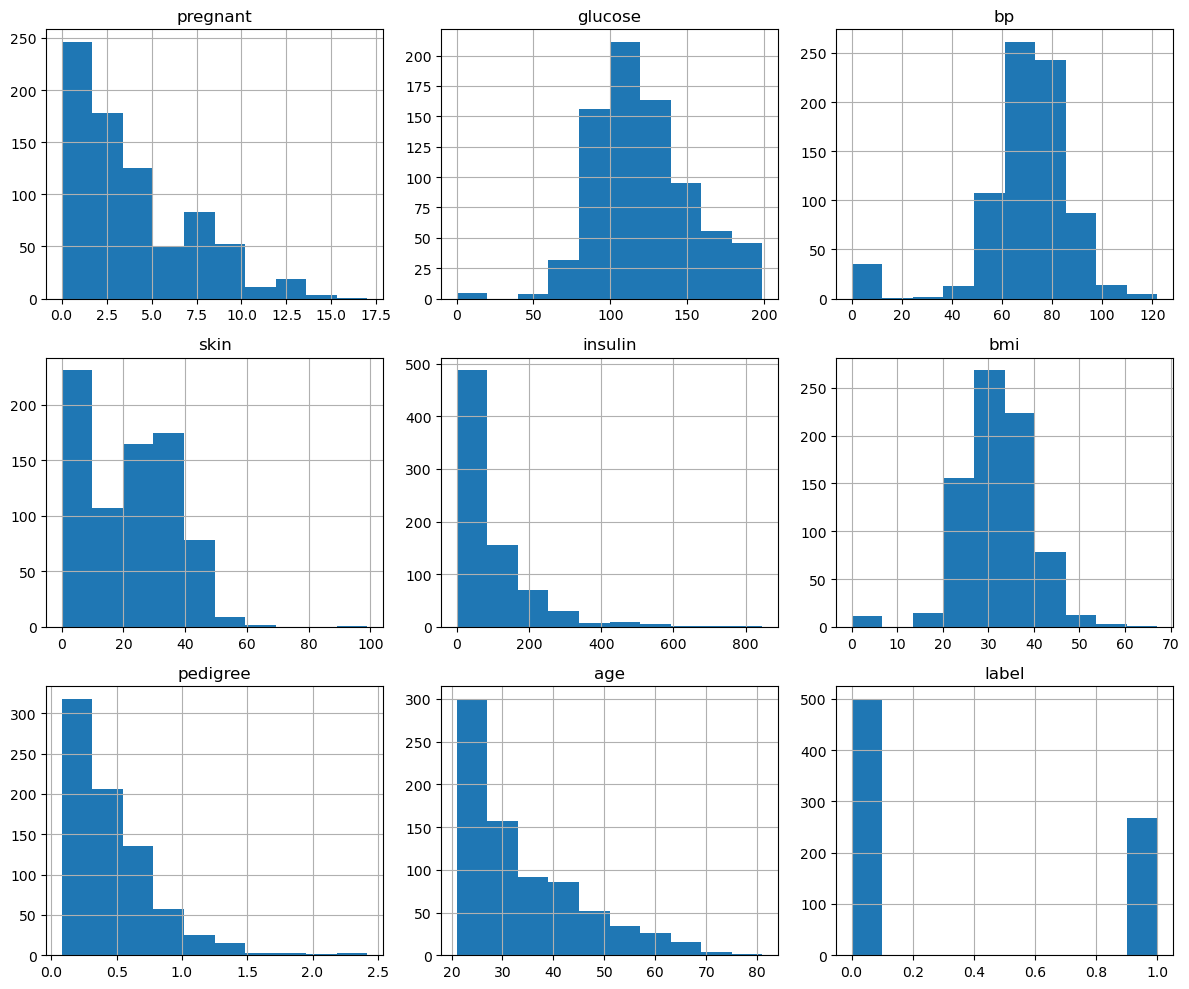

In [121]:
# Générer les histogrammes pour toutes les colonnes
diabetes_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


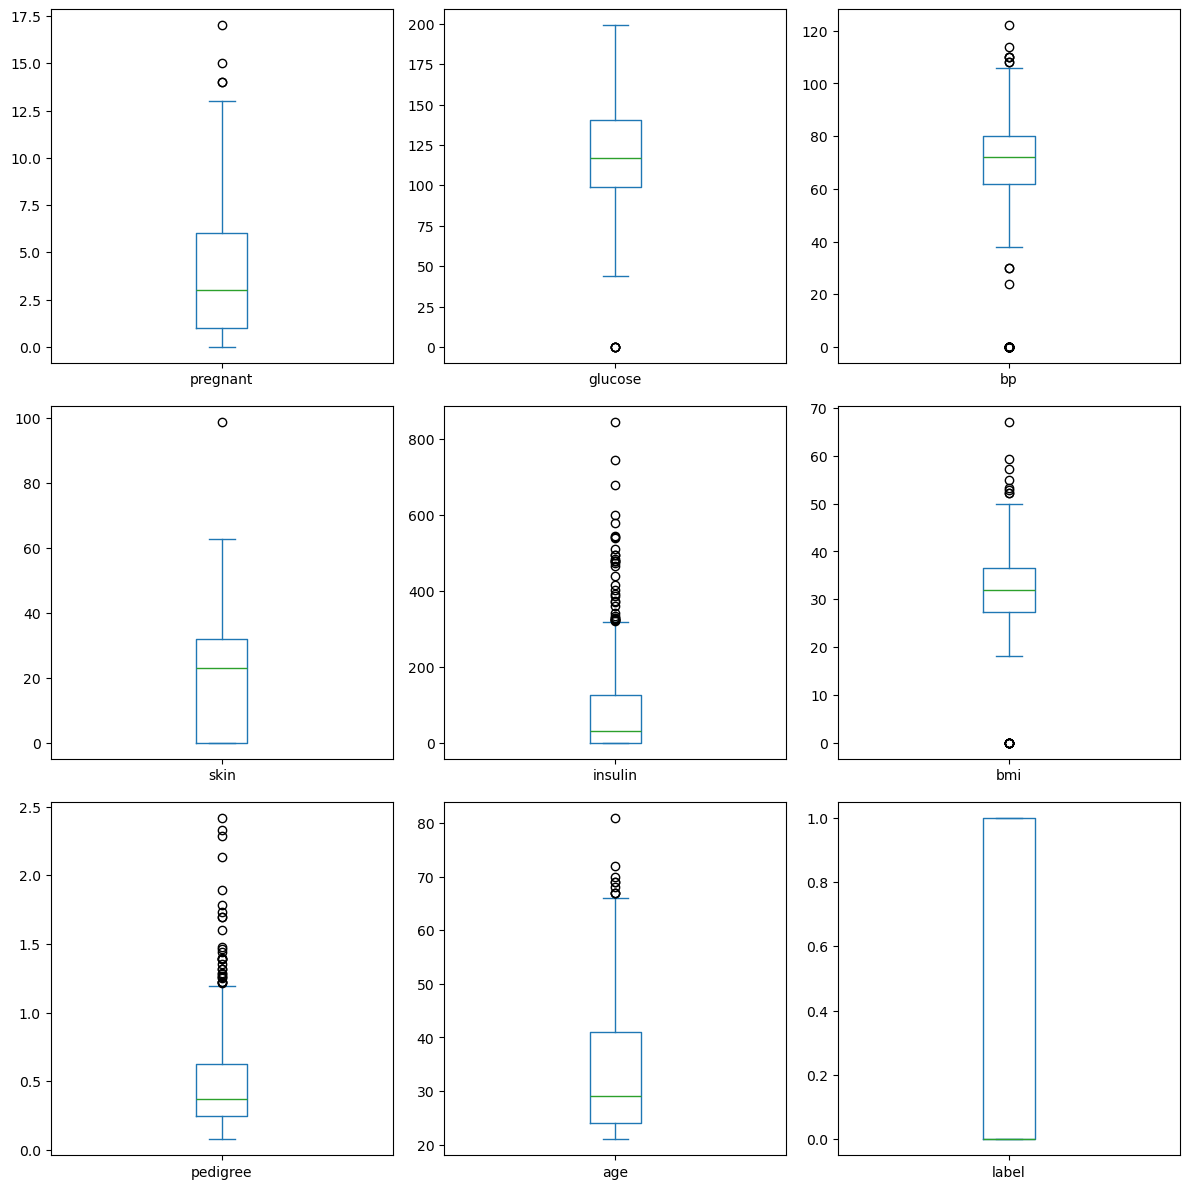

In [123]:
# Boxplots pour chaque variable
diabetes_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


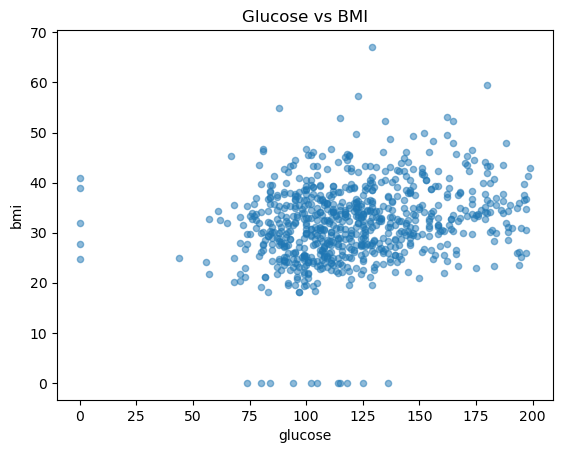

In [125]:
# Scatter plot entre glucose et bmi par exemple
diabetes_data.plot(kind='scatter', x='glucose', y='bmi', alpha=0.5)
plt.title('Glucose vs BMI')
plt.show()


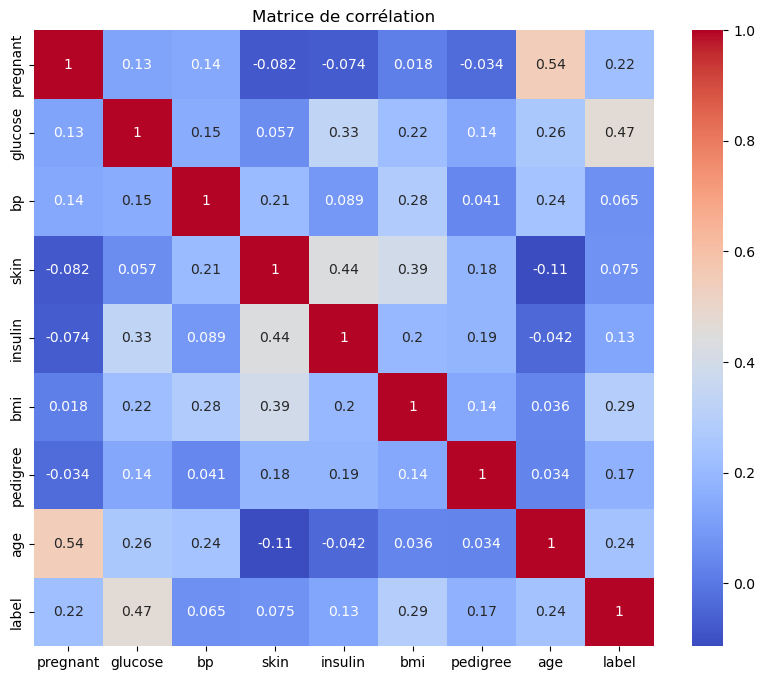

In [127]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


b/  il s'agit d'un problème de classification binaire.

In [130]:
# Définir les variables caractéristiques (X) et la variable cible (Y)
X = diabetes_data[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
Y = diabetes_data['label']

# Afficher un aperçu des variables X et Y
print("Caractéristiques (X):")
print(X.head())
print("\nVariable cible (Y):")
print(Y.head())


Caractéristiques (X):
   pregnant  glucose    bp  skin  insulin   bmi  pedigree   age
1       6.0    148.0  72.0  35.0      0.0  33.6     0.627  50.0
2       1.0     85.0  66.0  29.0      0.0  26.6     0.351  31.0
3       8.0    183.0  64.0   0.0      0.0  23.3     0.672  32.0
4       1.0     89.0  66.0  23.0     94.0  28.1     0.167  21.0
5       0.0    137.0  40.0  35.0    168.0  43.1     2.288  33.0

Variable cible (Y):
1    1.0
2    0.0
3    1.0
4    0.0
5    1.0
Name: label, dtype: float64


In [132]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles
print(f"Taille de l'ensemble d'apprentissage : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'apprentissage : (614, 8)
Taille de l'ensemble de test : (154, 8)


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Créer un modèle d'arbre de décision avec l'indice de Gini
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42)

# Entraîner le modèle sur l'ensemble d'apprentissage
decision_tree.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred = decision_tree.predict(X_test)

# Afficher les résultats de l'évaluation
print("Exactitude du modèle :", metrics.accuracy_score(Y_test, Y_pred))


Exactitude du modèle : 0.7467532467532467


Exactitude (Accuracy) du modèle : 0.75


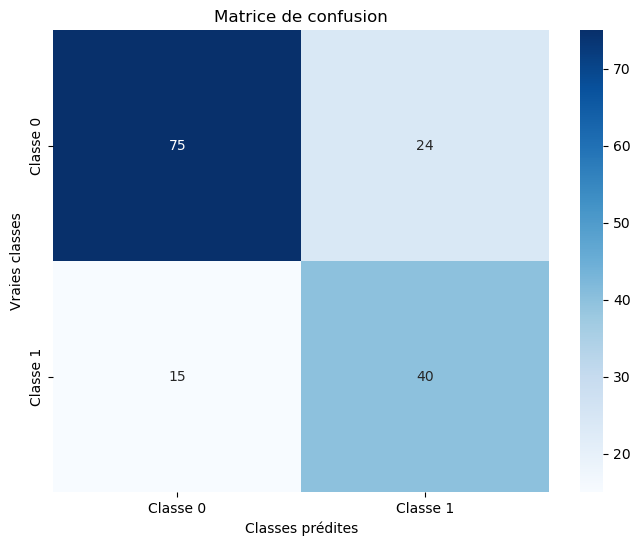

In [136]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer l'accuracy du modèle
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f"Exactitude (Accuracy) du modèle : {accuracy:.2f}")

# Calculer la matrice de confusion
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Afficher la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.title('Matrice de confusion')
plt.show()
